<a href="https://colab.research.google.com/github/gulshan911/Financial-Data-Analysis-and-Stock-Market-Trends-Project/blob/main/Financial_Data_Analysis_and_Stock_Market_Trends_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install yfinance pandas matplotlib seaborn plotly

In [5]:
pip install statsmodels scikit-learn tensorflow keras

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800
2020-01-06  72.582916  72.621654  70.876083  71.127873  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (High, AAPL)    1258 non-null   float64
 2   (Low, AAPL)     1258 non-null   float64
 3   (Open, AAPL)    1258 non-null   float64
 4   (Volume, AAPL)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memo

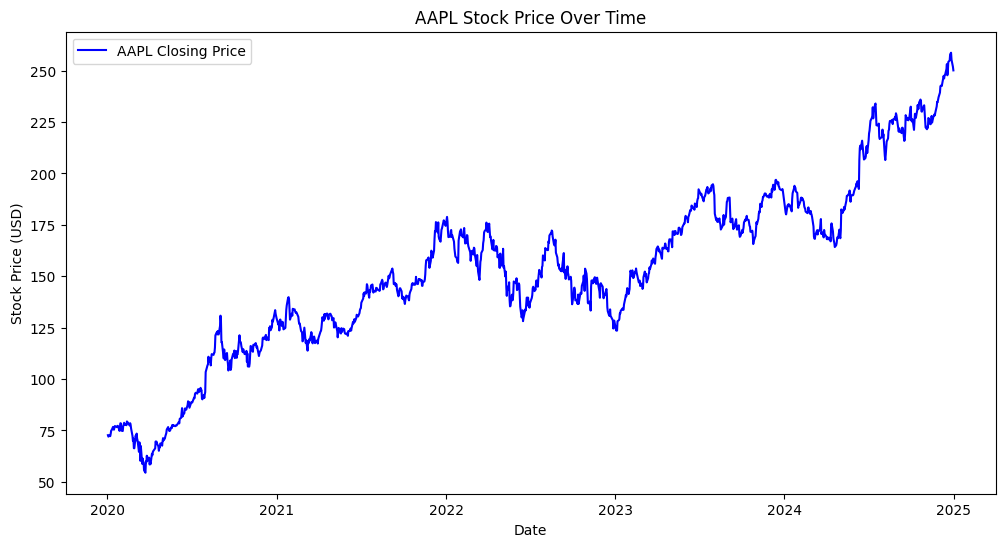

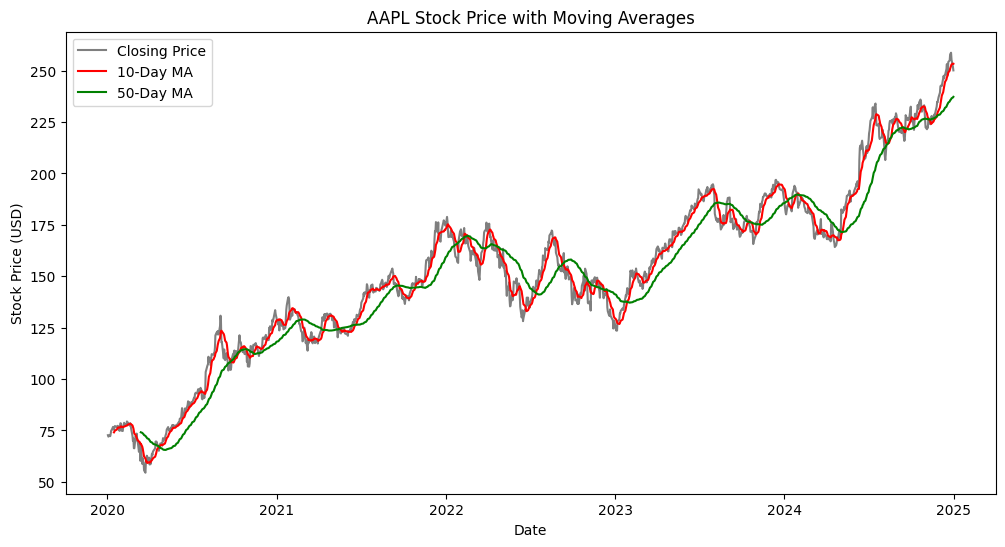

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Step 1: Fetch Stock Data
def get_stock_data(ticker, start="2020-01-01", end="2025-01-01"):
    stock = yf.download(ticker, start=start, end=end)
    return stock

# Fetch data for Apple (AAPL)
ticker = "AAPL"
df = get_stock_data(ticker)

# Step 2: Data Overview
print(df.head())  # Check the first few rows
print(df.info())  # Data summary

# Step 3: Plot Closing Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{ticker} Closing Price', color='blue')
plt.title(f"{ticker} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

# Step 4: Moving Averages (10-day & 50-day)
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Step 5: Plot with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='black', alpha=0.5)
plt.plot(df['MA_10'], label='10-Day MA', color='red')
plt.plot(df['MA_50'], label='50-Day MA', color='green')
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

# Step 6: Interactive Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Candlestick')])
fig.update_layout(title=f"{ticker} Candlestick Chart",
                  xaxis_title="Date",
                  yaxis_title="Stock Price (USD)",
                  template="plotly_dark")
fig.show()

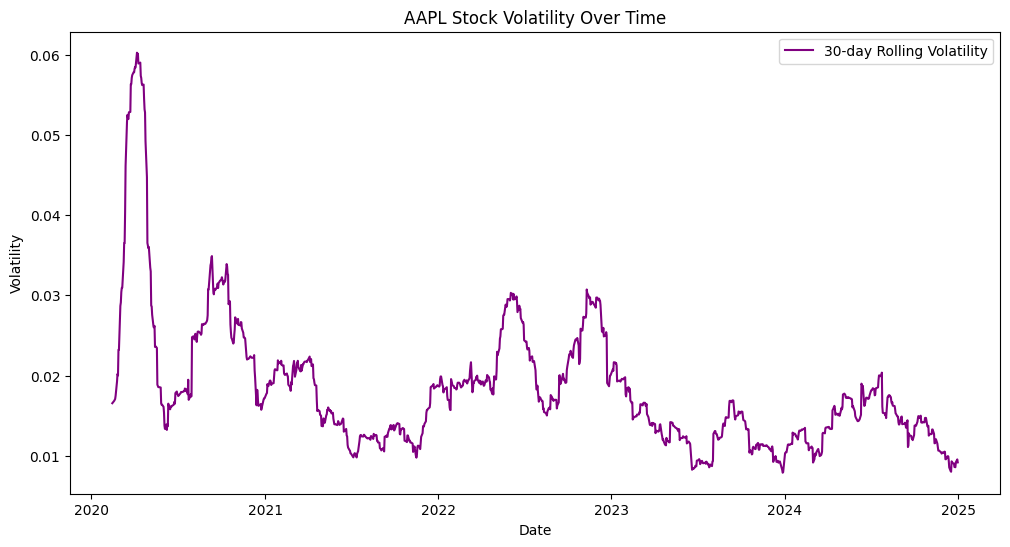

In [7]:
import numpy as np

# Step 7: Calculate Daily Returns (Log Returns)
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Step 8: Calculate Rolling Volatility (30-day window)
df['Volatility'] = df['Log_Returns'].rolling(window=30).std()

# Step 9: Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Volatility'], label='30-day Rolling Volatility', color='purple')
plt.title(f"{ticker} Stock Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

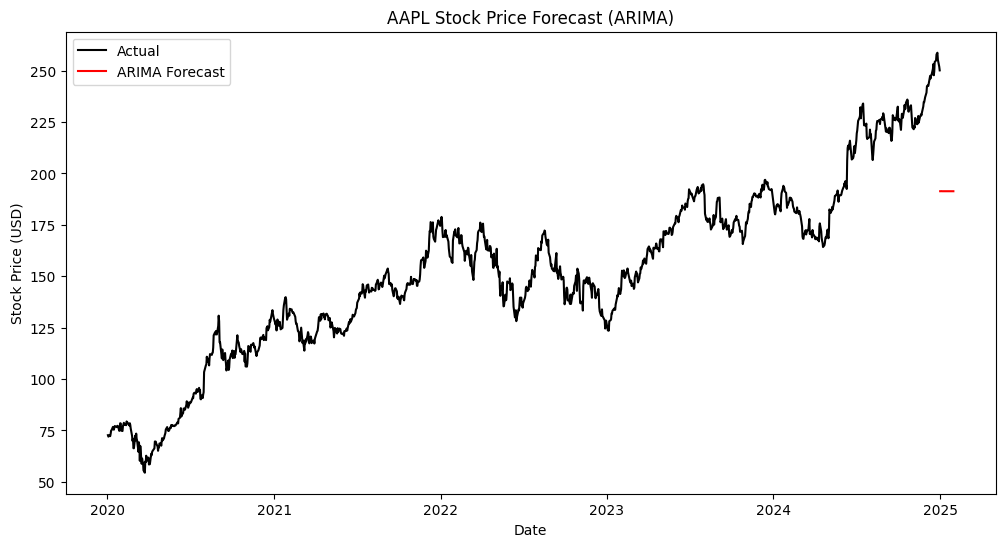

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Step 10: ARIMA Model
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# Train ARIMA Model (order: p=5, d=1, q=0)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Step 11: Forecast Next 30 Days
forecast = model_fit.forecast(steps=30)

# Step 12: Plot Forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Actual", color="black")
# The change is here. We are creating a date range for the forecasted values.
forecast_dates = pd.date_range(start=test.index[-1], periods=31, freq=test.index.freq)[1:]
plt.plot(forecast_dates, forecast, label="ARIMA Forecast", color="red") # Plotting forecasted values against generated dates
plt.title(f"{ticker} Stock Price Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0342
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0031
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0025
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0024
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0018
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0019
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0015
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0014
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0014
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0012
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


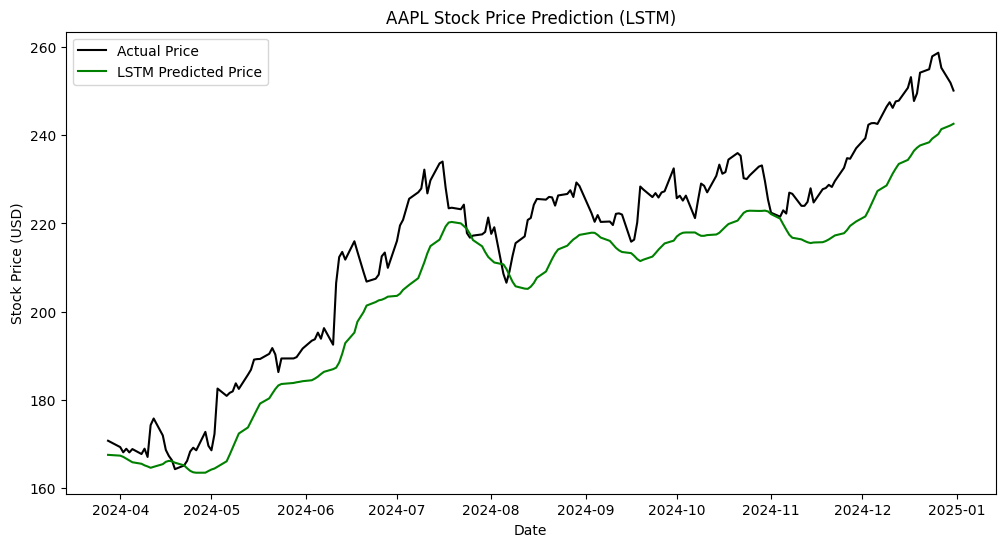

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler from the correct module

# Step 13: Data Preprocessing for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Close']])


train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

# Step 14: Create LSTM Data Sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Step 15: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 16: Train Model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Step 17: Predict on Test Data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Step 18: Plot LSTM Predictions
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], df['Close'].iloc[-len(y_test):], label="Actual Price", color="black")
plt.plot(df.index[-len(predictions):], predictions, label="LSTM Predicted Price", color="green")
plt.title(f"{ticker} Stock Price Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()
